# TOPMed Demo
## Trans-Omics for Precision Medicine | TOPMed 
### Live Presentation of BioNeuralNet.

A **step-by-step** guide to **BioNeuralNet**.

- This demonstration was made specifically for the 2025 TOPMed Annual Meeting. Featuring artificial intelligence and machine learning.

- For more information on TOPMed and their mission, please visit [TOPMed](https://topmed.nhlbi.nih.gov/).

In [ ]:
# In terminal use:
pip install bioneuralnet

# In Jupiter notebook use
!{sys.executable} -m pip install bioneuralnet

### BioNeuralNet Components

In [ ]:
from bioneuralnet.network_embedding import GNNEmbedding
from bioneuralnet.subject_representation import GraphEmbedding
from bioneuralnet.downstream_task import DPMON
from bioneuralnet.clustering import CorrelatedPageRank
from bioneuralnet.clustering import CorrelatedLouvain
from bioneuralnet.clustering import HybridLouvain
from bioneuralnet.datasets import DatasetLoader

from bioneuralnet.metrics import omics_correlation
from bioneuralnet.metrics import cluster_correlation
from bioneuralnet.metrics import louvain_to_adjacency
from bioneuralnet.metrics import evaluate_rf
from bioneuralnet.metrics import plot_variance_distribution
from bioneuralnet.metrics import plot_variance_by_feature
from bioneuralnet.metrics import plot_performance
from bioneuralnet.metrics import plot_embeddings
from bioneuralnet.metrics import plot_network
from bioneuralnet.metrics import compare_clusters

from bioneuralnet.utils import omics_data_filter
from bioneuralnet.utils import network_filter
from bioneuralnet.utils import rdata_to_df
from bioneuralnet.utils import get_logger

from bioneuralnet.external_tools import SmCCNet
from bioneuralnet.external_tools import WGCNA

## Loading your data:
- If you data is stored in a csv file, it can be loaded by following the example below.
- After loading your data, the remaining steps will be the same.

In [ ]:
import pandas as pd

genomic = pd.read_csv( "genes.csv")
proteomics = pd.read_csv("proteins.csv")
metabolites = pd.read_csv("metabolites.csv")
phenotype = pd.read_csv("phenotype.csv")
clinical_data = pd.read_csv("clinical.csv")

## Ease of component exploration via `DatasetLoader` 

- This component allows users to explore BioNeuralNet capabilities.

- DatasetLoader `example1` is synthetic and purely for example purposes.

In [4]:
from bioneuralnet.datasets import DatasetLoader
loader = DatasetLoader("example1")
omics1, omics2, phenotype, clinical = loader.load_data()

display(omics1)
display(omics2)
display(phenotype)
display(clinical)

,Gene_1,Gene_2,Gene_3,Gene_4,Gene_5,Gene_6,Gene_7,Gene_8,Gene_9,Gene_10,...,Gene_491,Gene_492,Gene_493,Gene_494,Gene_495,Gene_496,Gene_497,Gene_498,Gene_499,Gene_500
Samp_1,22.485701,40.353720,31.025745,20.847206,26.697293,30.205449,23.512005,33.677622,19.430333,30.260153,...,12.967210,13.334132,13.262070,13.608147,13.338606,15.247613,13.603157,14.727795,13.400950,12.769172
Samp_2,37.058850,34.052233,33.487020,23.531461,26.754628,31.735945,22.795952,29.301536,14.936397,30.823015,...,11.886247,13.241386,12.445773,13.400288,12.587993,15.048676,12.018609,14.513958,12.066379,12.583460
Samp_3,20.530767,31.669623,35.189567,20.952544,25.018826,32.157235,25.069464,22.853719,18.220225,23.092805,...,12.198357,12.869640,12.841290,13.127437,12.607377,14.398177,12.554904,14.339382,12.891962,12.760553
Samp_4,33.186888,38.480880,18.897097,31.823300,34.049383,38.799887,24.106468,12.397175,13.724255,27.703085,...,12.197502,13.312536,11.645099,13.933684,12.103087,15.133432,12.436027,15.116888,12.810732,12.972879
Samp_5,28.961981,41.060494,28.494956,18.374495,30.815238,24.004535,29.616296,24.364045,11.409338,33.599828,...,14.157141,13.386978,13.007109,13.826532,12.343930,15.280175,13.363962,14.008675,12.479124,12.156407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samp_354,24.520652,28.595409,31.299666,32.095379,33.659730,29.353948,29.871659,25.089732,14.437588,27.261916,...,11.748228,13.096453,12.768936,13.228560,11.595884,15.251601,12.055375,15.530606,13.644383,13.018032
Samp_355,31.252789,28.988087,29.574195,31.189288,32.098841,26.849138,22.619669,28.006670,8.615549,30.838843,...,11.460876,12.994504,13.325608,13.386970,12.335143,14.966097,13.998975,13.250821,12.947672,13.161434
Samp_356,24.894826,25.944887,30.852641,26.705158,30.102546,37.197952,35.032309,34.775576,13.354611,29.697348,...,12.884821,12.785372,12.954534,13.906209,12.074805,15.519179,12.742078,14.445011,12.129990,13.844271
Samp_357,17.034337,38.574705,25.095201,37.062442,35.417758,29.753145,25.855997,25.603043,13.180794,31.188598,...,13.278454,13.445404,12.457436,14.036252,13.412114,14.158416,13.284701,13.662274,12.943670,13.996352


,Mir_1,Mir_2,Mir_3,Mir_4,Mir_5,Mir_6,Mir_7,Mir_8,Mir_9,Mir_10,...,Mir_91,Mir_92,Mir_93,Mir_94,Mir_95,Mir_96,Mir_97,Mir_98,Mir_99,Mir_100
Samp_1,15.223913,17.545826,15.784719,14.891983,10.348205,9.689755,11.093630,13.189246,12.526561,10.311609,...,7.551462,5.407878,13.933045,10.287521,10.213316,10.609973,14.554996,10.955650,11.422531,10.862970
Samp_2,16.306965,16.672830,13.361529,14.488549,12.660905,11.333613,11.254930,13.457435,13.279747,10.428848,...,6.862413,7.309226,13.586180,11.975544,11.496937,10.653742,14.414225,11.811004,12.413667,10.719110
Samp_3,16.545119,16.735005,14.617472,17.845267,13.822790,11.329333,11.171749,12.715107,13.787771,10.364577,...,6.874958,7.754733,13.847029,12.424403,10.930177,10.255484,13.570352,11.311925,11.072915,11.418794
Samp_4,13.986899,16.207432,16.293078,17.725286,12.300565,9.844108,11.586551,11.878702,14.594392,10.936651,...,9.615623,6.693593,13.840728,12.245466,10.836894,11.502232,15.483399,10.812811,10.121957,11.039089
Samp_5,16.338332,17.393869,16.397925,15.853725,13.387675,10.599414,12.355466,12.450426,13.778779,10.405327,...,9.146865,8.104206,13.903452,11.423350,9.997107,10.744586,14.465583,11.730166,12.206151,10.724849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samp_354,15.065065,16.079830,14.635616,17.013845,11.612843,9.850100,11.375670,12.870558,13.873811,11.369083,...,8.110691,8.124900,14.316491,12.599296,10.302683,11.286541,14.478041,11.141163,11.102427,11.993050
Samp_355,15.997576,15.448951,15.355566,16.501752,11.701778,11.323521,11.610163,12.733208,13.650662,10.770903,...,8.711232,6.977555,14.805837,12.283549,10.847157,9.833187,14.037476,11.082880,11.708466,10.654141
Samp_356,15.206862,14.395378,16.218001,16.044955,13.650741,11.057462,13.324846,13.070428,16.109746,11.253359,...,7.497926,6.840175,15.048896,12.615673,10.583973,12.708186,16.325254,10.789635,10.830833,10.983455
Samp_357,14.474129,15.482863,15.512549,15.136613,14.531277,10.713539,11.632242,13.792981,13.486404,10.870028,...,7.902283,7.339226,14.295151,11.853855,10.439473,11.897782,16.684790,10.847185,11.491449,11.684467


,phenotype
Samp_1,235.067423
Samp_2,253.544991
Samp_3,234.204994
Samp_4,281.035429
Samp_5,245.447781
...,...
Samp_354,236.120451
Samp_355,222.572359
Samp_356,268.472285
Samp_357,235.808167


,Age,Gender,BMI,Chronic_Bronchitis,Emphysema,Asthma
PatientID,,,,,,
Samp_1,78,0,31.2,1,1,0
Samp_2,68,1,19.2,1,0,0
Samp_3,54,1,19.3,0,1,1
Samp_4,47,1,36.2,0,0,1
Samp_5,60,1,26.2,0,1,1
...,...,...,...,...,...,...
Samp_354,71,0,23.0,1,0,1
Samp_355,62,1,25.5,0,1,1
Samp_356,61,0,21.1,1,0,0


## Generating a Multi-Omics Network using SmCCNet
- SmCCNet stands for: Sparse Multiple Canonical Correlation Network Analysis Tool.

- Is one of our external tools offered through `external_tools`component.

- For more information on SmCCNet please visit docs [SmCCNet](https://cran.r-project.org/package=SmCCNet)

In [ ]:
from bioneuralnet.external_tools import SmCCNet
merged_omics = pd.concat([omics1, omics2, clinical, phenotype], axis=1)

smccnet = SmCCNet(
    phenotype_df=phenotype,
    omics_dfs=[omics1, omics2],
    data_types=["genes","proteins"],
)
global_network, smccnet_clusters = smccnet.run()

## SmCCNet Output
- SmCCNet returned a 600x600 network and 3 Sub Netwoks or Clusters.

In [6]:
display(global_network.shape)
display(len(smccnet_clusters))

(600, 600)

3

## Generating Low-Dimensional Embeddings using Graph Neural Networks to capture meaningful biological interactions.
- This will return node embeddings that reflect both local connectivity and supervised signals

- Each node (omics feature) is associated with a numeric label (e.g., Pearson correlation with phenotype) that guides learning.

In [ ]:
import pandas as pd
from bioneuralnet.network_embedding import GNNEmbedding

merged_omics = pd.concat([omics1, omics2], axis=1)

embeddings = GNNEmbedding(
    adjacency_matrix=global_network,
    omics_data=merged_omics,
    phenotype_data=phenotype,
    clinical_data=clinical,
    tune=True,
)
embeddings.fit()
embeddings_output = embeddings.embed(as_df=True)

## Output
For each Omic or Node in the network, our `GNNEmbedding` function generated a 64 dimmensional representation of that Omics.

In [8]:
display(embeddings_output.shape)

(600, 64)

In [ ]:
from bioneuralnet.metrics import plot_embeddings

# Using our embeddings instance we get the necessary labels for the graph.
global_node_labels = embeddings._prepare_node_labels()
embeddings_array = embeddings_output.values  

## Embeddings visualization
By visulizing the Emebedding Space in a 2 dimensional space. We can notice some cluster of Nodes/Omics. Highlighting close relationships between them.

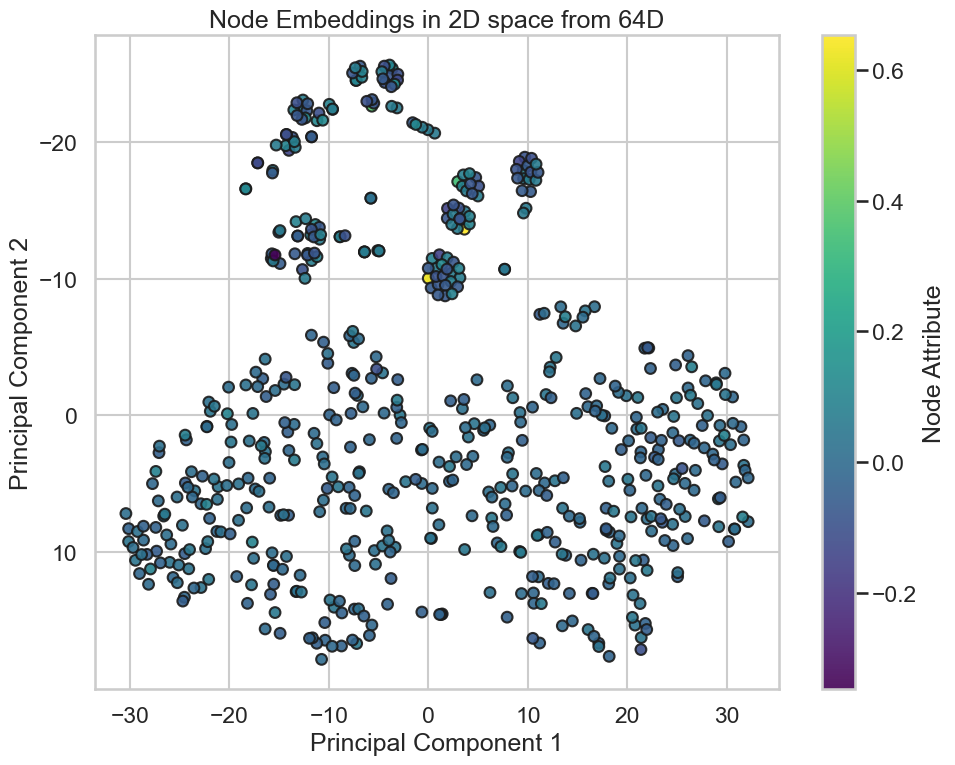

In [10]:
fig1 = plot_embeddings(embeddings_array, global_node_labels.to_frame(name="phenotype"), method="tsne")

## Using the Embeddings
- Let use this omics to enrich the representation of the original dataset.

- The `GraphEmbedding` function takes our previously generated embeddings and our original Omics Dataset and associated Phenotype

- This function will use the embeddings to enrich the orignal dataset. For more details and how this is performed please view our `GNN Embeddings for Multi-Omics` tab.

In [ ]:
from bioneuralnet.downstream_task  import GraphEmbedding

enhanced_omics = GraphEmbedding(
    omics_data=merged_omics,
    embeddings=embeddings_output,
    phenotype_data=phenotype,
    tune=True,
)
enhanced_omics_df = enhanced_omics.run()

In [12]:
display(enhanced_omics_df)

,Gene_45,Gene_197,Gene_493,Gene_432,Gene_357,Gene_382,Gene_152,Gene_427,Gene_41,Gene_130,...,Gene_202,Gene_249,Gene_280,Gene_62,Mir_21,Gene_495,Mir_59,Gene_340,Gene_291,Gene_81
Samp_1,-2.917084,-13.297334,-30.571794,-29.143930,42.021213,-12.279085,-6.925227,-2.520610,10.380707,-6.079539,...,10.465338,1.922512,5.955446,-2.626381,13.947213,-2.806483,-0.553959,1.726373,-2.651651,-2.406555
Samp_2,-3.102466,-12.954265,-28.690063,-27.614380,41.053950,-12.463960,-6.747382,-2.712280,10.841243,-6.340821,...,10.551755,1.800501,5.912429,-2.548239,12.697251,-2.648551,-0.624136,1.708398,-2.596500,-2.342931
Samp_3,-2.837912,-13.429165,-29.601810,-28.448539,39.378358,-12.837721,-6.436741,-2.377240,10.565243,-6.044507,...,10.307515,1.991552,6.038545,-2.479833,13.769784,-2.652630,-0.592947,1.583839,-2.653498,-2.446277
Samp_4,-2.859205,-12.821326,-26.844345,-29.029980,36.148898,-12.449477,-7.229847,-2.609629,11.160280,-6.466545,...,9.915145,2.137159,5.804663,-2.629407,13.458064,-2.546526,-0.499689,1.648553,-2.520416,-2.530145
Samp_5,-2.982405,-12.612553,-29.984057,-29.110915,46.903902,-12.758489,-6.868394,-2.698423,10.211682,-6.265595,...,10.592827,2.231166,5.314841,-2.462155,12.673634,-2.597200,-0.638230,1.709379,-2.481453,-2.397491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samp_354,-2.935778,-13.323266,-29.435019,-27.890044,43.240876,-12.561521,-6.723627,-2.290536,10.847353,-6.341079,...,10.186933,2.077744,5.888022,-2.566317,13.658852,-2.439809,-0.526501,1.692860,-2.711183,-2.466377
Samp_355,-3.065084,-13.295135,-30.718263,-29.112126,44.613763,-12.331960,-6.955723,-2.971791,10.294231,-6.077254,...,9.624207,2.077401,5.623264,-2.663072,14.311062,-2.595351,-0.584500,1.673485,-2.578159,-2.418925
Samp_356,-3.069497,-14.104972,-29.862862,-30.838439,39.916304,-12.129115,-6.739620,-2.504380,10.865619,-6.296479,...,10.497804,1.984929,5.467676,-2.442813,14.854524,-2.540575,-0.527353,1.648124,-2.674988,-2.482001
Samp_357,-3.112670,-14.041763,-28.716949,-28.512552,48.270441,-12.605819,-6.424579,-2.768089,11.026826,-6.542514,...,10.566136,2.141326,6.178911,-2.667312,13.193234,-2.821949,-0.585463,1.659515,-2.625582,-2.425626


## Comparing results
Lets compare the enriched dataset vs the raw dataset by using it with a popular machine learning technique, `Random Forest`. In this example we are simply using the high-dimensional omics data to make prediction on the phenotype.

- Our entire codebase is publicly avaible at the [Big Data Management and Mining Laboratory](https://github.com/UCD-BDLab) github repository.

- For specific details on this code, please visit: [BioNeuralNet](https://github.com/UCD-BDLab/BioNeuralNet)

In [ ]:
from bioneuralnet.metrics import evaluate_rf, plot_performance

y_phenotype = phenotype.values
X_enriched_omics = enhanced_omics_df.values
X_raw_omics = merged_omics.values

accuracy_with_embeddings = evaluate_rf(X_enriched_omics, y_phenotype, mode="regression")
accuracy_alone = evaluate_rf(X_enriched_omics, y_phenotype, mode="regression")

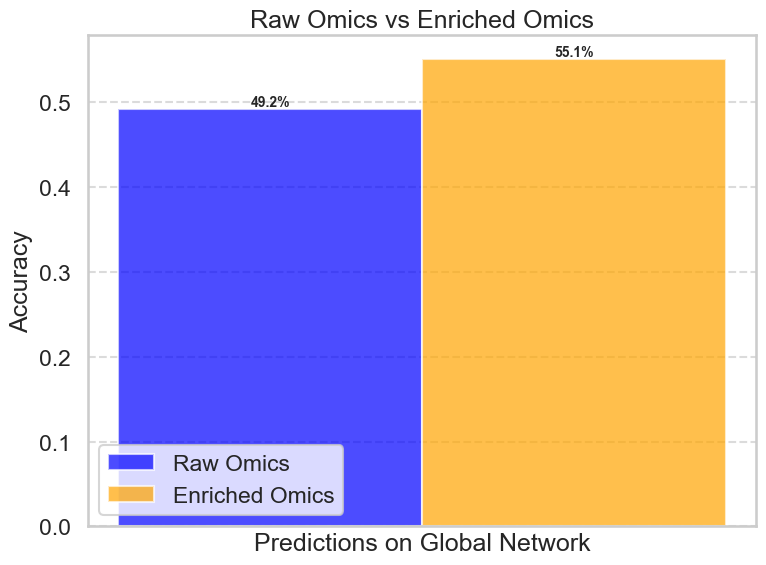

In [26]:
plot_performance(accuracy_with_embeddings, accuracy_alone, "Raw Omics vs Enriched Omics")

## Network Visulization
- As part of this demonstration, I have developed a number of graphic and plotting tools.

- Please note that these tools are not part of the BioNeuralNet core, and it is not my intent to present them this way.

- This examples highlight how external libraies and your own code can be easily integrated into our workflow. Allowing users to further explore the omics-data.

- All this code and visulization aid components will be availble after the presentation.

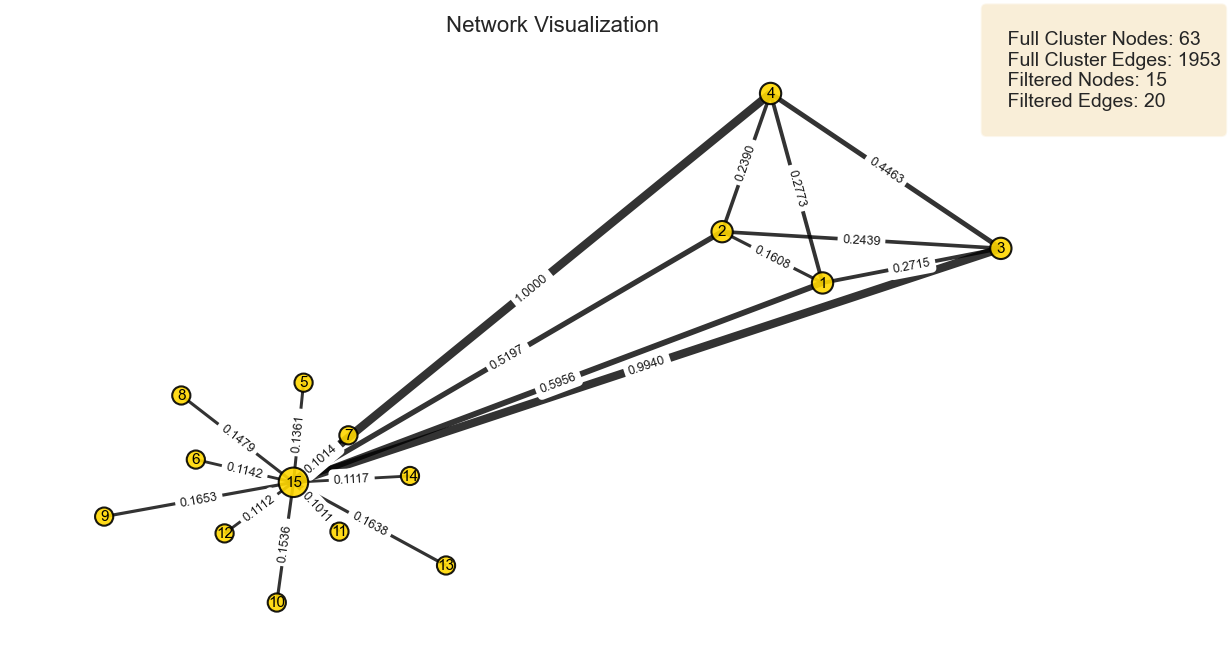

,Omic,Degree
Index,,
15,Mir_2,14
1,Gene_1,4
2,Gene_2,4
3,Gene_6,4
4,Gene_7,4


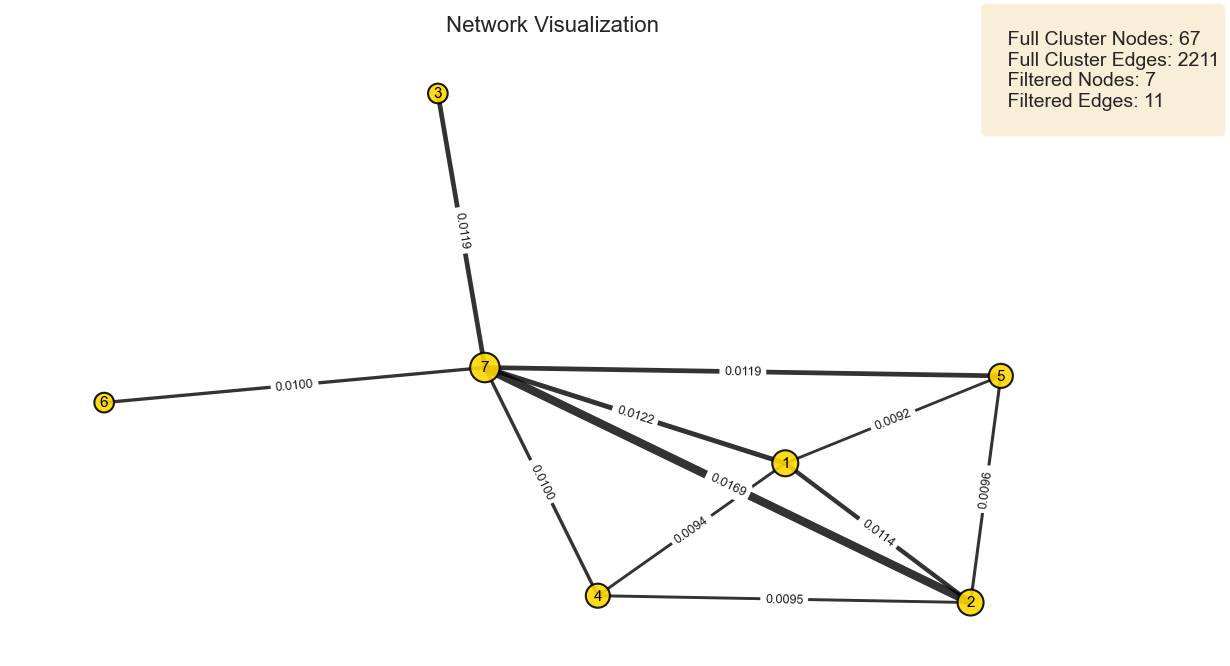

,Omic,Degree
Index,,
7,Mir_53,6
1,Gene_5,4
2,Gene_54,4
4,Gene_88,3
5,Gene_174,3


In [ ]:
# Lets take a quick look at some of those clusters from SmCCNet
from bioneuralnet.metrics import plot_network

cluster1, cluster2, cluster3 = smccnet_clusters

cluster1_mapping = plot_network(cluster2, weight_threshold=0.1, show_labels=True, show_edge_weights=True)
display(cluster1_mapping.head())

cluster2_mapping = plot_network(cluster1, weight_threshold=0.009, show_labels=True, show_edge_weights=True)
display(cluster2_mapping.head())


## Correlated Clustering
- BioNeuralNet includes internal modules for performing correlated clustering on complex networks. 

- These methods modify and extend the traditional community detection by integrating phenotype correlation, allowing users to extract biologically relevant, phenotype-associated modules from any network. 

- For more details on how this performed, please visit our `Correlated Clustering Methods` tab

In [ ]:
from bioneuralnet.clustering import CorrelatedLouvain
import networkx as nx

merged_omics = pd.concat([omics1, omics2], axis=1)
G_network = nx.from_pandas_adjacency(global_network)

louvain_instance = CorrelatedLouvain(
    G=G_network,
    B=merged_omics,
    Y=phenotype,
    tune=True
)

louvain_clusters = louvain_instance.run(as_dfs=True)

In [17]:
print(len(louvain_clusters))

3


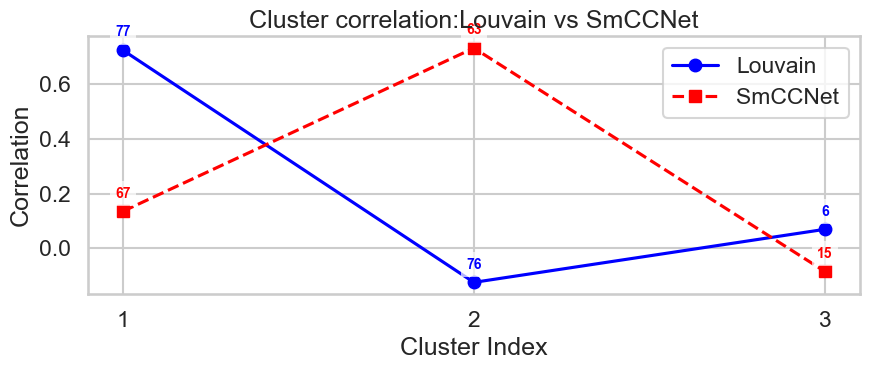

,Cluster,Louvain Size,Louvain Correlation,SMCCNET Size,SMCCNET Correlation
0,Cluster_1,77,0.724029,67,0.134853
1,Cluster_2,76,-0.124891,63,0.731769
2,Cluster_3,6,0.069064,15,-0.085057


In [ ]:
# Lets comapre these clusters against SmCCNet clusters
from bioneuralnet.metrics import compare_clusters

compare_clusters(louvain_clusters, smccnet_clusters, phenotype, merged_omics)

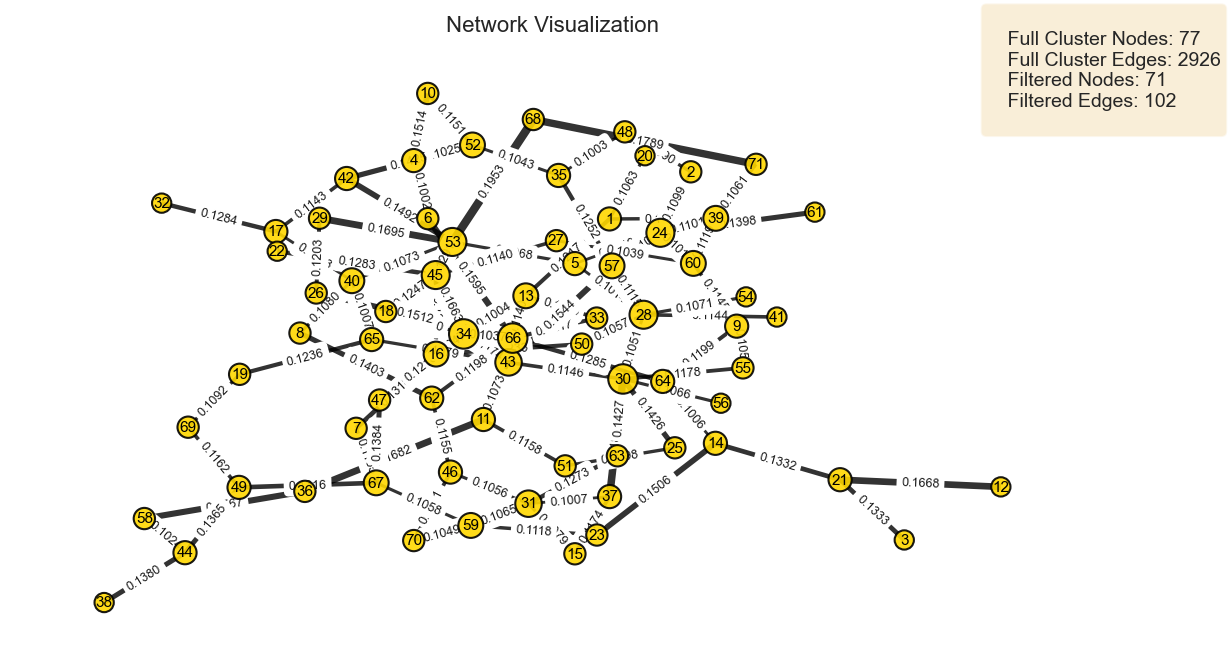

,Omic,Degree
Index,,
34,Gene_222,7
30,Mir_2,7
66,Gene_1,7
45,Gene_6,6
53,Gene_7,6


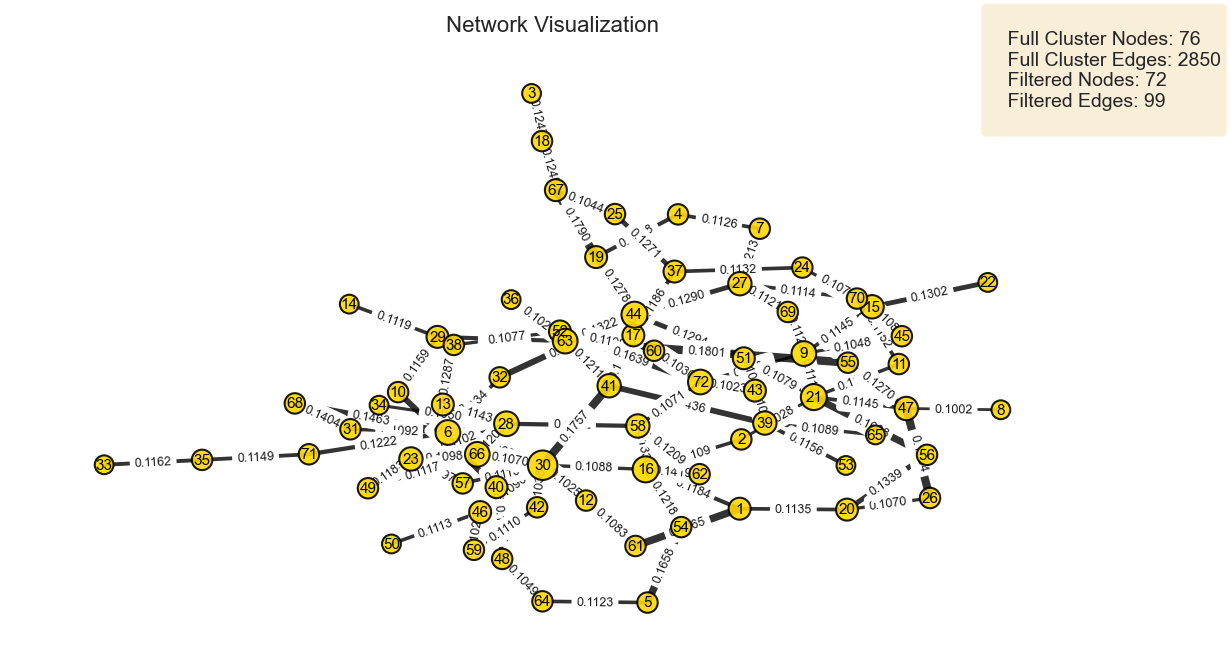

,Omic,Degree
Index,,
30,Gene_187,9
44,Gene_464,6
21,Gene_83,6
16,Gene_354,6
9,Gene_300,5


In [ ]:
from bioneuralnet.metrics import plot_network, louvain_to_adjacency

cluster1 = louvain_clusters[0]
cluster2 = louvain_clusters[1]

# Convert Louvain clusters into adjacency matrices
louvain_adj1 = louvain_to_adjacency(cluster1)
louvain_adj2 = louvain_to_adjacency(cluster2)

# Plot using the converted adjacency matrices
cluster1_mapping = plot_network(louvain_adj1, weight_threshold=0.1, show_labels=True, show_edge_weights=True)
display(cluster1_mapping.head())

cluster2_mapping = plot_network(louvain_adj2, weight_threshold=0.1, show_labels=True, show_edge_weights=True)
display(cluster2_mapping.head())


In [20]:
from bioneuralnet.datasets import DatasetLoader
import numpy as np

loader = DatasetLoader("example1")
omics1, omics2, phenotype, clinical = loader.load_data()
display(phenotype)

min_val = phenotype["phenotype"].min()
max_val = phenotype["phenotype"].max()

# linspace creates an array of evenly spaced values
bins = np.linspace(min_val, max_val, 5)

phenotype["phenotype"] = pd.cut(phenotype["phenotype"], bins=bins, labels=[0, 1, 2, 3], include_lowest=True)
count_values = phenotype["phenotype"].value_counts(sort=False)

display(phenotype)
display(count_values)

,phenotype
Samp_1,235.067423
Samp_2,253.544991
Samp_3,234.204994
Samp_4,281.035429
Samp_5,245.447781
...,...
Samp_354,236.120451
Samp_355,222.572359
Samp_356,268.472285
Samp_357,235.808167


,phenotype
Samp_1,1
Samp_2,2
Samp_3,1
Samp_4,3
Samp_5,2
...,...
Samp_354,1
Samp_355,1
Samp_356,2
Samp_357,1


phenotype
0     38
1    158
2    141
3     21
Name: count, dtype: int64

## DPMON (Disease Prediction using Multi-Omics Networks) reuses the same GNN architectures but with a different objective: 

- DPMON aggregates node embeddings with patient-level omics data. 

- A downstream classification head is applied for sample-level disease prediction.

- This end-to-end approach leverages both local (node-level) and global (patient-level) network information.

- This single cell bellow captures the entire workflow demonstrated earlier (Generating GNN Embeddins + Integrating these Embeddings back into Omics Dataset) in an end-to-end iterative pipeline. 

In [ ]:
from bioneuralnet.downstream_task import DPMON
dpmon = DPMON(
    adjacency_matrix=global_network,
    omics_list=[omics1, omics2],
    phenotype_data=phenotype,
    clinical_data=clinical,
    tune=True,
)
dpmon_predictions = dpmon.run()

In [22]:
display(dpmon_predictions[0])

,Actual,Predicted
0,1,1
1,2,2
2,1,1
3,3,3
4,2,2
...,...,...
353,1,1
354,1,1
355,2,2
356,1,1


## DPMON allows BioNeuralNet users to significatly improve phenotype predictions with a few lines of code.

In [ ]:
from bioneuralnet.metrics import evaluate_rf

X_raw = merged_omics.values
y_global = phenotype.values
raw_rf_acc = evaluate_rf(X_raw, y_global, mode="classification")

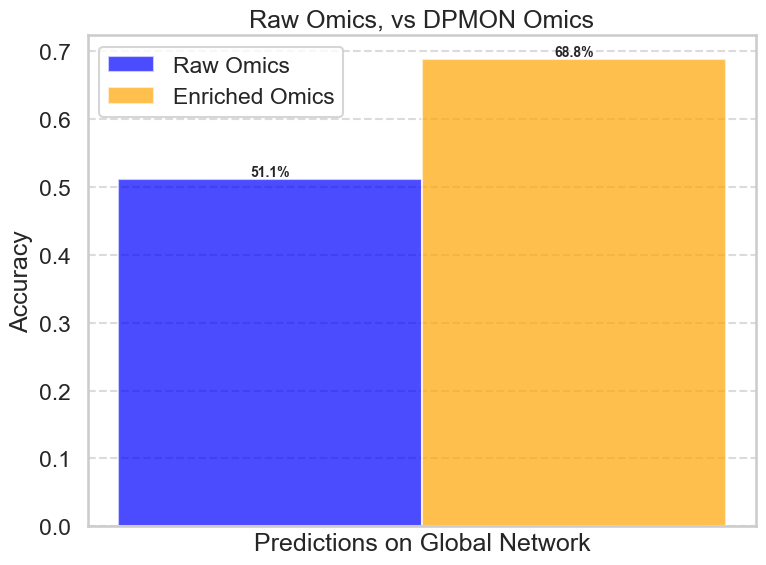

In [24]:
from bioneuralnet.utils import plot_performance
plot_performance(dpmon_predictions[1], raw_rf_acc, "Raw Omics, vs DPMON Omics")